# Loan Prediction

## Importing Necessary Libraries

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import warnings
import joblib
warnings.simplefilter(action='ignore', category=UserWarning)
%matplotlib inline

## Reading the dataset

In [269]:
data = pd.read_csv("train.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Understanding the data

In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [271]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Data Cleaning & Pre-processing

### Dropping off Loan_ID column because it is not important

In [272]:
data = data.drop('Loan_ID',axis=1)

### Checking Missing Values In Each Column Of The Dataset

In [273]:
data.apply(lambda x: sum(x.isnull()),axis=0) 

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Appropriately Handling Missing Values

In [274]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [275]:
data.Gender = data.Gender.fillna('Male')

In [276]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [277]:
data.Married = data.Married.fillna('Yes')

In [278]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [279]:
data.Dependents = data.Dependents.fillna('0')

In [280]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [281]:
data.Self_Employed = data.Self_Employed.fillna('Yes')

In [282]:
data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())

In [283]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [284]:
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(360.0)

In [285]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [286]:
data.Credit_History = data.Credit_History.fillna(1.0)

### Here , we can see that we do not have any missing values now

In [287]:
data.apply(lambda x: sum(x.isnull()),axis=0)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [288]:
data.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

### In the dependents column we have 3+ entries , in order to use this in a machine learning model we must convert it in a numerical value

In [289]:
data.Dependents=data.Dependents.replace(to_replace="3+",value="4")
data.Dependents.unique()

array(['0', '1', '2', '4'], dtype=object)

In [290]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


## Visualization

In [291]:
def bar_chart(col): 
    Approved = data[data["Loan_Status"]=="Y"][col].value_counts() 
    Disapproved = data[data["Loan_Status"]=="N"][col].value_counts() 
    
    df1 = pd.DataFrame([Approved, Disapproved]) 
    df1.index = ["Approved", "Disapproved"] 
    ax = df1.plot(kind="bar")
    ax.set_title(f"This bar charts shows how the {col} parameter effects the Loan Approval/Rejection.")

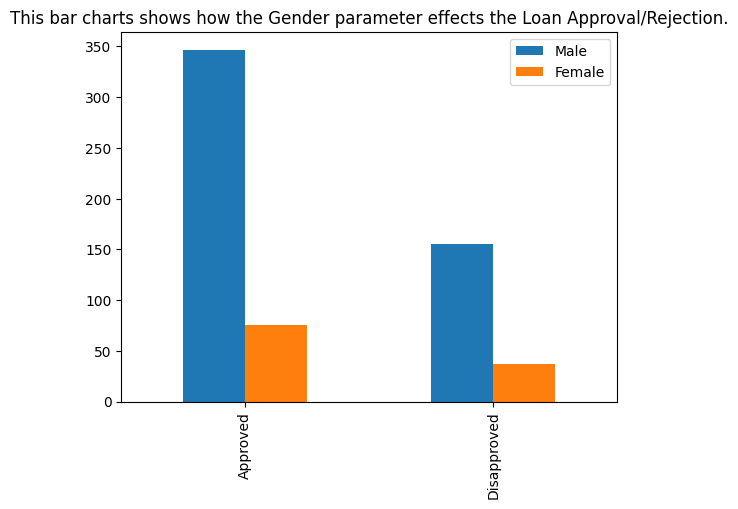

In [292]:
bar_chart("Gender")

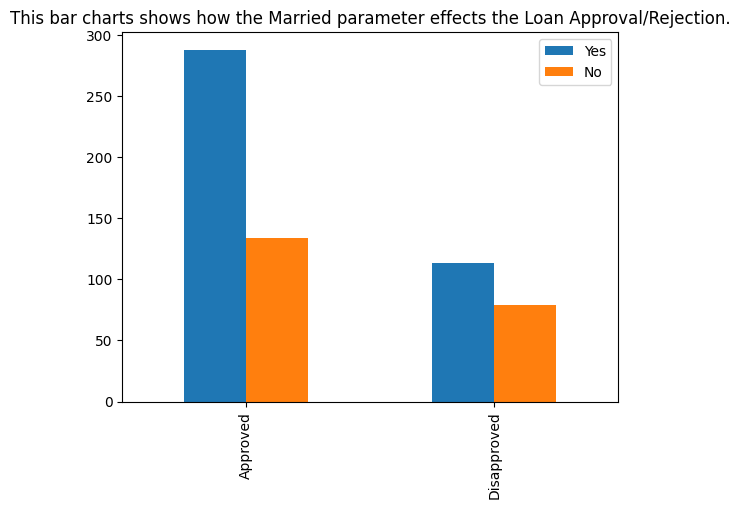

In [293]:
bar_chart("Married")

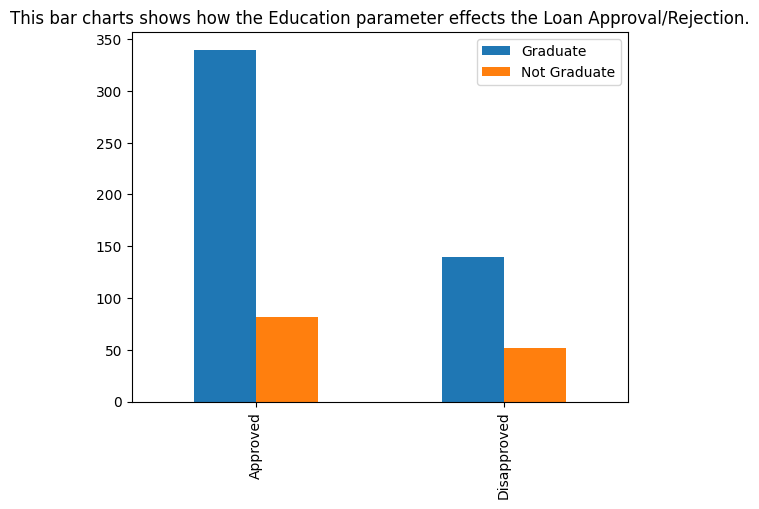

In [294]:
bar_chart("Education")

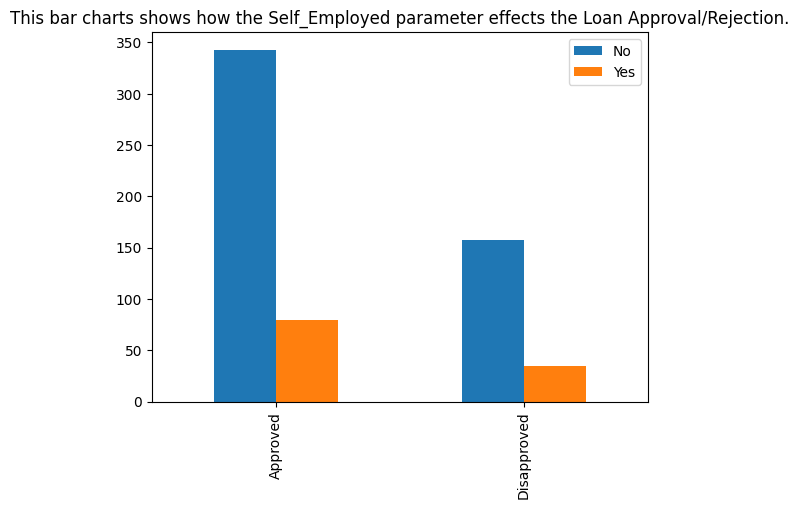

In [295]:
bar_chart("Self_Employed")

## Handling Categorical Columns

#### Machine learning model can only understand numerical value , so we must convert our categorical variables into numerical variables

In [296]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [297]:
data['Gender']=data['Gender'].map({"Male":1,"Female":0}).astype("int")
data['Married']=data['Married'].map({"Yes":1,"No":0}).astype("int")
data['Education']=data['Education'].map({"Graduate":1,"Not Graduate":0}).astype("int")
data['Self_Employed']=data['Self_Employed'].map({"Yes":1,"No":0}).astype("int")
data['Property_Area']=data['Property_Area'].map({"Urban":1,"Rural":0,"Semiurban":2}).astype("int")
data['Loan_Status']=data['Loan_Status'].map({"Y":1,"N":0}).astype("int")

In [298]:
data['Loan_Status'].unique()

array([1, 0])

### Successfully handled categorical values

In [299]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


## Machine Learning

### Splitting independent and dependent variables of the data

#### X is the feature matrix (independent variables)
#### y is the target/response variable (dependent variable)

In [300]:
X = data.drop("Loan_Status",axis=1)
y = data['Loan_Status']

### Feature Scaling

#### We can see that some of the values are not in the same range
#### Feature Scaling , basically means to scale all the columns in an appropriate range
#### If Feature scaling is not  performed then columns with higher values starts dominating the machine learning response 
#### We are going to perform feature scaling on only those columns which are not in the same range as the others

In [301]:
cols = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]

In [302]:
st = StandardScaler()
X[cols] = st.fit_transform(X[cols])

#### Now all the columns are in the same range

In [303]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,0.072991,-0.554487,0.000000,0.273231,1.0,1
1,1,1,1,1,0,-0.134412,-0.038732,-0.219273,0.273231,1.0,0
2,1,1,0,1,1,-0.393747,-0.554487,-0.957641,0.273231,1.0,1
3,1,1,0,0,0,-0.462062,0.251980,-0.314547,0.273231,1.0,1
4,1,0,0,1,0,0.097728,-0.554487,-0.064454,0.273231,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.410130,-0.554487,-0.898095,0.273231,1.0,0
610,1,1,4,1,0,-0.212557,-0.554487,-1.267279,-2.522836,1.0,0
611,1,1,1,1,0,0.437174,-0.472404,1.269371,0.273231,1.0,1
612,1,1,2,1,0,0.357064,-0.554487,0.483367,0.273231,1.0,1


### Cross Validation

#### Cross validation allows us to compare different machine learning algos and get a sense of how well will they work in practice.
#### Cross valiation does iteration and uses the first 20% of the data for testing while the remaining for training , then it uses the 2nd 20% for testing and so on. So every part is used in training and testing and finally it summarizes the score

### Creating an empty dictionaries which we will populate with model names and their respective scores

In [304]:
model_accuracy_scores = {}
model_cv_scores = {}

### Function For Model Training

#### Here we have defined a function to perform prediction and evaluate accuracy and cross validation scores , so we dont have to manually check everything seperately.

#### We are using 5-fold cross validation as we have 5 parts of 20% testing data

In [305]:
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    cross_validation_score = np.mean(cross_val_score(model,X,y,cv=5))
    
    print(f"{model} accuracy is {accuracy}")
    print(f"{model} average cross validation score is {cross_validation_score}")
    
    # Storing the percentage of accuracy and cross validation scores in the dictionaries , rounded off , 5 places
    model_accuracy_scores[model]=round(accuracy*100,5) 
    model_cv_scores[model]=round(cross_validation_score*100,5)

### Logistic Regression

In [306]:
model = LogisticRegression()
model_val(model=model,X=X,y=y)

LogisticRegression() accuracy is 0.7886178861788617
LogisticRegression() average cross validation score is 0.8061975209916034


### SVC - Support Vector Classifier

In [307]:
model = SVC()
model_val(model=model,X=X,y=y)

SVC() accuracy is 0.7804878048780488
SVC() average cross validation score is 0.8013061442089832


### Decision Tree Classifier

In [308]:
model = DecisionTreeClassifier()
model_val(model=model,X=X,y=y)

DecisionTreeClassifier() accuracy is 0.6585365853658537
DecisionTreeClassifier() average cross validation score is 0.7150339864054378


### Random Forrest Classifier

In [309]:
model = RandomForestClassifier()
model_val(model=model,X=X,y=y)

RandomForestClassifier() accuracy is 0.7723577235772358
RandomForestClassifier() average cross validation score is 0.7785419165667067


### Gradient Forrest Classifier

In [310]:
model = GradientBoostingClassifier()
model_val(model=model,X=X,y=y)

GradientBoostingClassifier() accuracy is 0.7723577235772358
GradientBoostingClassifier() average cross validation score is 0.7801279488204719


#### We have used all the models with default (fixed) parameter
#### One way of increasing the accuracy is to perform hyperparameter tuning
#### Hyper parameters are optional and adjustable parameters that be used in order to obtain a model with optimal performance
#### There are two best strategies for hyper parameter tuning
- Grid Search CV --> This will go through the all the intermediate combinations , making it computationally very heavy and expensive
- Randomized Search CV --> This goes through only a fixed number of combinations  , this reduces unnecessary computations , which is why we are going to be using this one.

### Hyper Parameter Tuning

#### Logistic Regression

In [311]:
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":['liblinear']}

In [312]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                   param_distributions=log_reg_grid,
                  n_iter=20,cv=5,verbose=True)

In [313]:
rs_log_reg.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [314]:
rs_log_reg.best_score_

0.809462881514061

In [315]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

#### Logistic Regression With The Best Parameters

In [316]:
solver,C = rs_log_reg.best_params_['solver'],rs_log_reg.best_params_['C']
model = LogisticRegression(solver=solver,C=C)
model_val(model=model,X=X,y=y)

LogisticRegression(C=0.23357214690901212, solver='liblinear') accuracy is 0.7886178861788617
LogisticRegression(C=0.23357214690901212, solver='liblinear') average cross validation score is 0.809462881514061


#### SVC

In [317]:
svc_grid = {'C':[0.25,0.50,0.75,1],"kernel":["linear"]}

In [318]:
rs_svc=RandomizedSearchCV(SVC(),
                  param_distributions=svc_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)

In [319]:
rs_svc.fit(X,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [320]:
rs_svc.best_score_

0.809462881514061

In [321]:
rs_svc.best_params_

{'kernel': 'linear', 'C': 0.25}

#### SVC With The Best Parameters

In [322]:
kernel,C=rs_svc.best_params_['kernel'],rs_svc.best_params_['C']
model = SVC(kernel=kernel,C=C)
model_val(model=model,X=X,y=y)

SVC(C=0.25, kernel='linear') accuracy is 0.7886178861788617
SVC(C=0.25, kernel='linear') average cross validation score is 0.809462881514061


#### Random Forrest Classifier

In [323]:
rf_grid={'n_estimators':np.arange(10,1000,10),
  'max_features':['auto','sqrt'],
 'max_depth':[None,3,5,10,20,30],
 'min_samples_split':[2,5,20,50,100],
 'min_samples_leaf':[1,2,5,10]
 }



In [324]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                  param_distributions=rf_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)

In [325]:
rs_rf.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 9

In [326]:
rs_rf.best_score_

0.8094628815140611

In [327]:
rs_rf.best_params_

{'n_estimators': 160,
 'min_samples_split': 100,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

#### RF With The Best Parameters

In [328]:
n_estimators = rs_rf.best_params_['n_estimators']
min_samples_split = rs_rf.best_params_['min_samples_split']
min_samples_leaf = rs_rf.best_params_['min_samples_leaf']
max_features = rs_rf.best_params_['max_features']
max_depth = rs_rf.best_params_['max_depth']

model = RandomForestClassifier(n_estimators=n_estimators,
                               min_samples_split=min_samples_split,
                               min_samples_leaf=min_samples_leaf,
                               max_features=max_features,
                               max_depth=max_depth)
model_val(model=model,X=X,y=y)

RandomForestClassifier(max_depth=30, min_samples_split=100, n_estimators=160) accuracy is 0.7886178861788617
RandomForestClassifier(max_depth=30, min_samples_split=100, n_estimators=160) average cross validation score is 0.807823537251766


In [329]:
model_accuracy_scores

{LogisticRegression(): 78.86179,
 SVC(): 78.04878,
 DecisionTreeClassifier(): 65.85366,
 RandomForestClassifier(): 77.23577,
 GradientBoostingClassifier(): 77.23577,
 LogisticRegression(C=0.23357214690901212, solver='liblinear'): 78.86179,
 SVC(C=0.25, kernel='linear'): 78.86179,
 RandomForestClassifier(max_depth=30, min_samples_split=100, n_estimators=160): 78.86179}

In [330]:
model_cv_scores

{LogisticRegression(): 80.61975,
 SVC(): 80.13061,
 DecisionTreeClassifier(): 71.5034,
 RandomForestClassifier(): 77.85419,
 GradientBoostingClassifier(): 78.01279,
 LogisticRegression(C=0.23357214690901212, solver='liblinear'): 80.94629,
 SVC(C=0.25, kernel='linear'): 80.94629,
 RandomForestClassifier(max_depth=30, min_samples_split=100, n_estimators=160): 80.78235}

## Based on the above accuracy and cross-validation scores , we can conclude that Logistic Regression is the best algorithm accuracy-wise

In [334]:
lr_model = LogisticRegression()
lr_model.fit(X,y)
joblib.dump(lr_model,"model")

['model']

In [335]:
model = joblib.load('model')

In [336]:
df = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':2,
    'Education':0,
    'Self_Employed':0,
    'ApplicantIncome':2889,
    'CoapplicantIncome':0.0,
    'LoanAmount':45,
    'Loan_Amount_Term':180,
    'Credit_History':0,
    'Property_Area':1
},index=[0])

In [337]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,2,0,0,2889,0.0,45,180,0,1


In [339]:
result = model.predict(df)
result

array([1])